<a href="https://colab.research.google.com/github/joshfpedro/math-328/blob/main/polynomial_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Lagrange Basis Polynomials

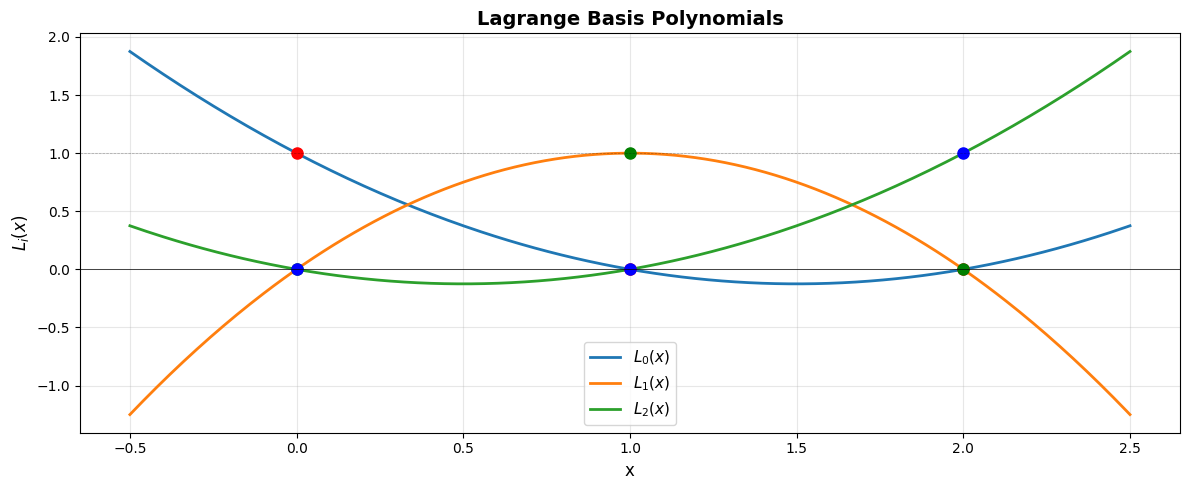

In [2]:
# Three points: (0, 1), (1, 3), (2, 2)
x_data = np.array([0.0, 1.0, 2.0])
y_data = np.array([1.0, 3.0, 2.0])

# Compute Lagrange basis polynomials
x = np.linspace(-0.5, 2.5, 300)

def lagrange_basis(x, x_data, i):
    """Compute i-th Lagrange basis polynomial"""
    L = np.ones_like(x)
    for j in range(len(x_data)):
        if j != i:
            L *= (x - x_data[j]) / (x_data[i] - x_data[j])
    return L

plt.figure(figsize=(12, 5))

# Plot each basis polynomial
for i in range(len(x_data)):
    L_i = lagrange_basis(x, x_data, i)
    plt.plot(x, L_i, linewidth=2, label=f'$L_{i}(x)$')

# Mark the data points
plt.plot(x_data, [1, 0, 0], 'ro', markersize=8)
plt.plot(x_data, [0, 1, 0], 'go', markersize=8)
plt.plot(x_data, [0, 0, 1], 'bo', markersize=8)

plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axhline(y=1, color='k', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('$L_i(x)$', fontsize=12)
plt.title('Lagrange Basis Polynomials', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

## Lagrange Polynomial Interpolation

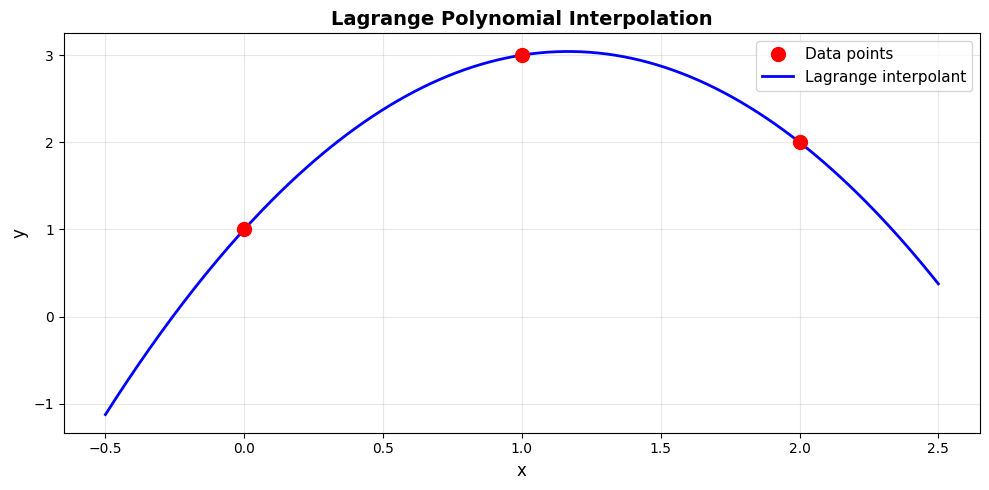

In [3]:
def lagrange_interpolation(x_data, y_data, x):
    """
    Compute Lagrange interpolating polynomial at points x.

    Parameters
    ----------
    x_data : array
        Data x-coordinates
    y_data : array
        Data y-coordinates
    x : array
        Points to evaluate interpolant

    Returns
    -------
    P : array
        Interpolated values
    """
    n = len(x_data)
    P = np.zeros_like(x, dtype=float)

    for i in range(n):
        # Compute i-th Lagrange basis polynomial
        L_i = np.ones_like(x, dtype=float)
        for j in range(n):
            if j != i:
                L_i *= (x - x_data[j]) / (x_data[i] - x_data[j])

        # Add contribution: y_i * L_i(x)
        P += y_data[i] * L_i

    return P

# Test it
x_test = np.linspace(-0.5, 2.5, 300)
P = lagrange_interpolation(x_data, y_data, x_test)

plt.figure(figsize=(10, 5))
plt.plot(x_data, y_data, 'ro', markersize=10, label='Data points', zorder=3)
plt.plot(x_test, P, 'b-', linewidth=2, label='Lagrange interpolant')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Lagrange Polynomial Interpolation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

## Newton's Divided Differences

In [4]:
# Same data: (0, 1), (1, 3), (2, 2)
x_data = np.array([0.0, 1.0, 2.0])
y_data = np.array([1.0, 3.0, 2.0])

def divided_differences(x_data, y_data):
    """
    Compute divided difference table.
    """
    n = len(x_data)
    F = np.zeros((n, n))
    F[:, 0] = y_data

    for j in range(1, n):
        for i in range(n - j):
            F[i, j] = (F[i+1, j-1] - F[i, j-1]) / (x_data[i+j] - x_data[i])

    return F

F = divided_differences(x_data, y_data)

print("Divided Difference Table:")
print("=" * 70)
print(f"{'i':<5} {'x_i':<8} {'f[x_i]':<12} {'f[x_i,x_i+1]':<15} {'f[x_i,x_i+1,x_i+2]':<15}")
print("-" * 70)
for i in range(len(x_data)):
    row = f"{i:<5} {x_data[i]:<8.1f} {F[i, 0]:<12.1f}"
    if i < len(x_data) - 1:
        row += f" {F[i, 1]:<15.1f}"
    if i < len(x_data) - 2:
        row += f" {F[i, 2]:<15.1f}"
    print(row)

print("\n" + "="*70)
print("How to read the table:")
print(f"  Coefficient a₀ = {F[0, 0]} (first row, first column)")
print(f"  Coefficient a₁ = {F[0, 1]} (first row, second column)")
print(f"  Coefficient a₂ = {F[0, 2]} (first row, third column)")
print("\nNewton's polynomial:")
print(f"  P(x) = {F[0,0]:.1f} + {F[0,1]:.1f}(x - 0) + {F[0,2]:.1f}(x - 0)(x - 1)")
print(f"  P(x) = 1 + 2x - 1.5x(x - 1)")

Divided Difference Table:
i     x_i      f[x_i]       f[x_i,x_i+1]    f[x_i,x_i+1,x_i+2]
----------------------------------------------------------------------
0     0.0      1.0          2.0             -1.5           
1     1.0      3.0          -1.0           
2     2.0      2.0         

How to read the table:
  Coefficient a₀ = 1.0 (first row, first column)
  Coefficient a₁ = 2.0 (first row, second column)
  Coefficient a₂ = -1.5 (first row, third column)

Newton's polynomial:
  P(x) = 1.0 + 2.0(x - 0) + -1.5(x - 0)(x - 1)
  P(x) = 1 + 2x - 1.5x(x - 1)


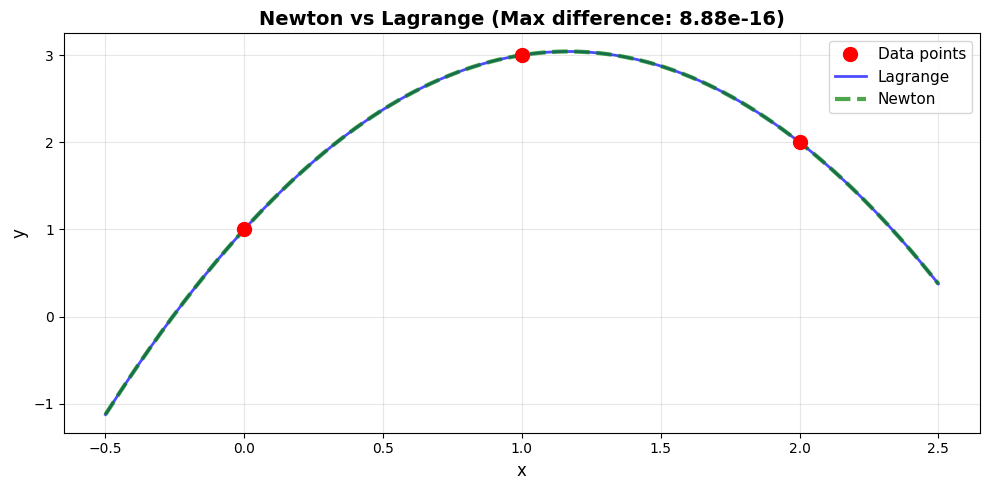

Maximum difference between methods: 8.88e-16
They give the SAME polynomial!


In [6]:
# Function to Plot Newton's Polynomial
def newton_interpolation(x_data, y_data, x):
    """
    Compute Newton interpolating polynomial.
    """
    F = divided_differences(x_data, y_data)
    n = len(x_data)
    P = np.zeros_like(x, dtype=float)

    for i in range(n):
        # Build the i-th term: F[0,i] * (x-x_0)*(x-x_1)*...*(x-x_{i-1})
        term = F[0, i] * np.ones_like(x, dtype=float)
        for j in range(i):
            term *= (x - x_data[j])
        P += term

    return P

# Compare Newton vs Lagrange
x_test = np.linspace(-0.5, 2.5, 300)
P_lagrange = lagrange_interpolation(x_data, y_data, x_test)
P_newton = newton_interpolation(x_data, y_data, x_test)

# Check if they're the same
max_diff = np.max(np.abs(P_lagrange - P_newton))

plt.figure(figsize=(10, 5))
plt.plot(x_data, y_data, 'ro', markersize=10, label='Data points', zorder=3)
plt.plot(x_test, P_lagrange, 'b-', linewidth=2, label='Lagrange', alpha=0.7)
plt.plot(x_test, P_newton, 'g--', linewidth=3, label='Newton', alpha=0.7)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title(f'Newton vs Lagrange (Max difference: {max_diff:.2e})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"Maximum difference between methods: {max_diff:.2e}")
print("They give the SAME polynomial!")

## Runge's Phenomenon

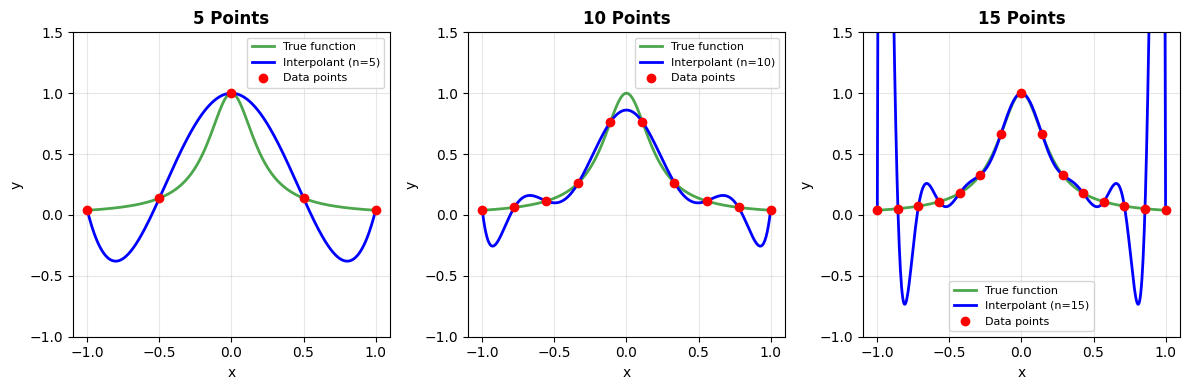

In [8]:
# Runge's function
f_runge = lambda x: 1 / (1 + 25 * x**2)

# Equally spaced points
n_values = [5, 10, 15]
x_fine = np.linspace(-1, 1, 500)
y_true = f_runge(x_fine)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for idx, n in enumerate(n_values):
    x_data = np.linspace(-1, 1, n)
    y_data = f_runge(x_data)

    # Lagrange interpolation
    y_interp = lagrange_interpolation(x_data, y_data, x_fine)

    axes[idx].plot(x_fine, y_true, 'g-', linewidth=2, label='True function', alpha=0.7)
    axes[idx].plot(x_fine, y_interp, 'b-', linewidth=2, label=f'Interpolant (n={n})')
    axes[idx].plot(x_data, y_data, 'ro', markersize=6, label='Data points')
    axes[idx].set_xlabel('x', fontsize=10)
    axes[idx].set_ylabel('y', fontsize=10)
    axes[idx].set_title(f'{n} Points', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim([-1, 1.5])
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()